# Analisi di serie temporali sull'andamento della camminata
# Paziente S008 - Camminata Normale


In [1]:
# imports 

import pandas as pd
import numpy as np
import tstools.analysis as ts_analysis
import tstools.plot as ts_plot
import tstools.data_manipulation as ts_data
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import math as math
import scipy.fftpack as sft

import sys
sys.path.insert(1, '../../python_modules/')
import helper as helper
import project_analysis as analysis
import method_analysis as method_analysis

## Analisi del paziente sano S008 con camminata normale

- Osservazione : i dati vengono forniti già filtrati 

In [2]:
# read the filtered dataset
dataset_path = '../../datasets/008/S008_N_2-filtered.csv'
dataset = pd.read_csv(dataset_path)

In [3]:
dataset.head()

,Unnamed: 0,x_naso,y_naso,l_naso,x_torace,y_torace,l_torace,x_spalla_dx,y_spalla_dx,l_spalla_dx,...,l_piede_sx_3,x_piede_dx_1,y_piede_dx_1,l_piede_dx_1,x_piede_dx_2,y_piede_dx_2,l_piede_dx_2,x_piede_dx_3,y_piede_dx_3,l_piede_dx_3
0,0,1272.629512,205.883842,0.405137,1299.232568,271.434776,0.127672,1275.432002,268.770481,0.264625,...,0.083010,1124.406084,710.896008,0.702491,1131.439641,705.682420,0.682770,1203.787351,721.650987,0.619305
1,1,1262.238921,207.815270,0.479220,1292.900625,272.231455,0.227296,1266.392760,270.111729,0.338379,...,0.135742,1116.888179,712.464633,0.704283,1122.926560,707.255501,0.683235,1194.049004,721.441739,0.624993
2,2,1251.770569,209.507061,0.549721,1286.246380,272.870563,0.322957,1257.179576,271.293280,0.409105,...,0.188373,1110.101525,714.078933,0.704840,1115.217781,708.848746,0.682685,1185.062558,721.134626,0.630277
3,3,1241.242273,210.793813,0.613778,1279.117582,273.246266,0.411328,1247.751904,272.200215,0.474377,...,0.241518,1104.437453,715.769308,0.703784,1108.758316,710.486006,0.681057,1177.280687,720.727080,0.635296
4,4,1230.665554,211.574146,0.669890,1271.432721,273.291636,0.490575,1238.083474,272.750137,0.533125,...,0.295089,1100.215288,717.498319,0.700168,1103.921521,712.131451,0.677665,1171.043317,720.159286,0.639663


### Analisi

- Vengono eliminati inoltre i valori nulli presenti 

In [4]:
y_piede_dx_1 = helper.delete_nan(dataset.y_piede_dx_1)
y_piede_dx_2 = helper.delete_nan(dataset.y_piede_dx_2)
y_piede_dx_3 = helper.delete_nan(dataset.y_piede_dx_3)

print("Il numero di elementi nulli presenti nella colonna è : {}".format(y_piede_dx_1.count('NaN')))

Il numero di elementi nulli presenti nella colonna è : 0


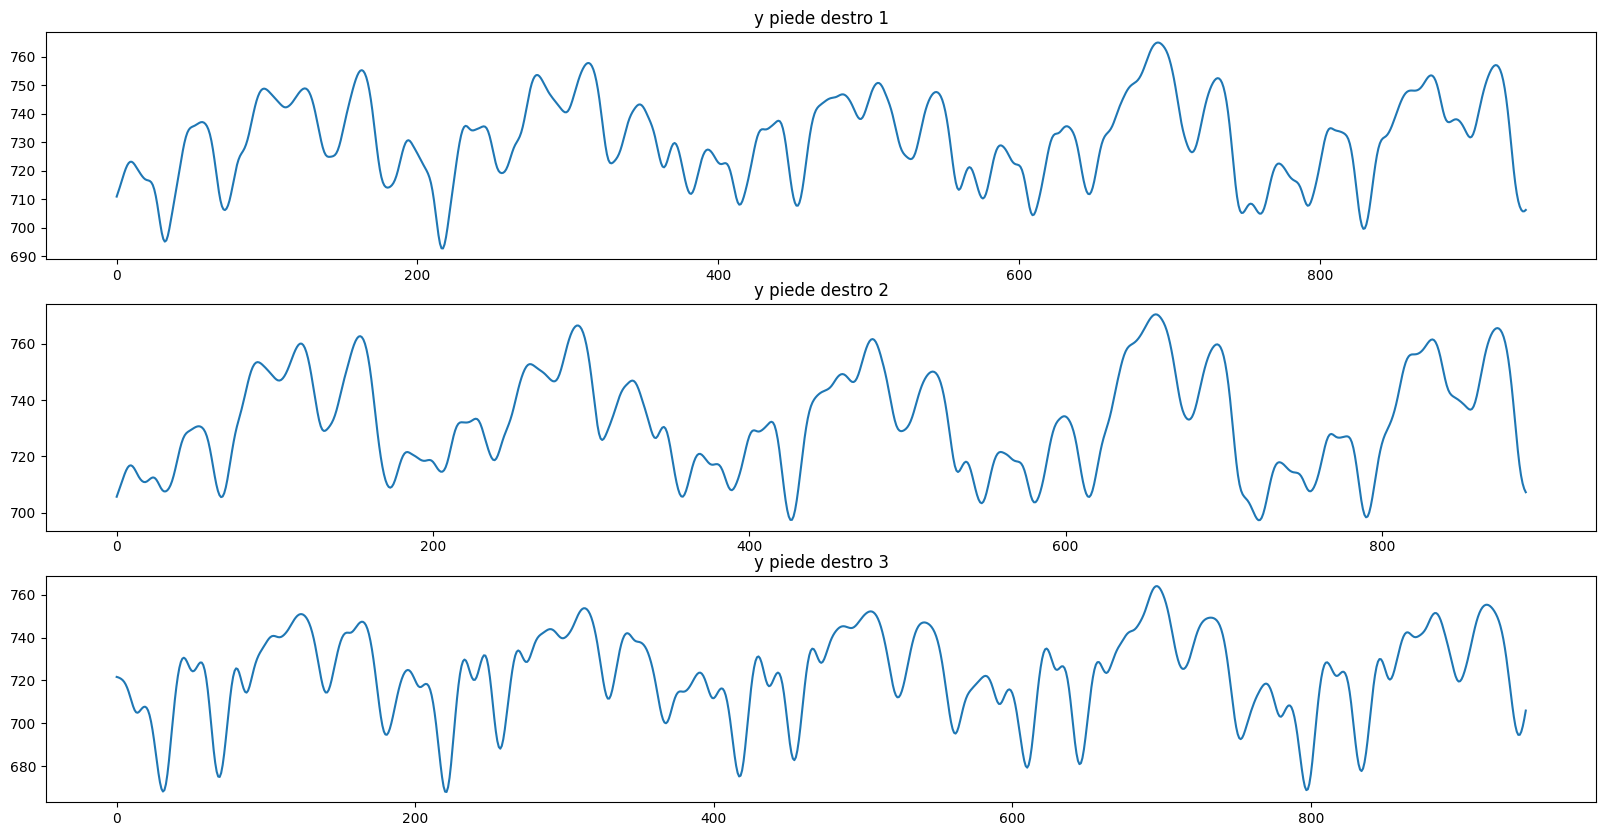

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.title('y piede destro 1')
plt.plot(y_piede_dx_1)

plt.subplot(3,1,2)
plt.title('y piede destro 2')
plt.plot(y_piede_dx_2)

plt.subplot(3,1,3)
plt.title('y piede destro 3')
plt.plot(y_piede_dx_3)

In [6]:
periods = helper.intspace_(300).tolist()
best_error, best_period, all_error_in_range = method_analysis.method_1([y_piede_dx_1, y_piede_dx_2, y_piede_dx_3], periods[17:100])
print('[--] error: {}  |  best period: {} | Number of errors finded:  {} '.format(best_error, best_period , len(all_error_in_range)))

[--] error: 32.742708150919846  |  best period: 25 | Number of errors finded:  83 


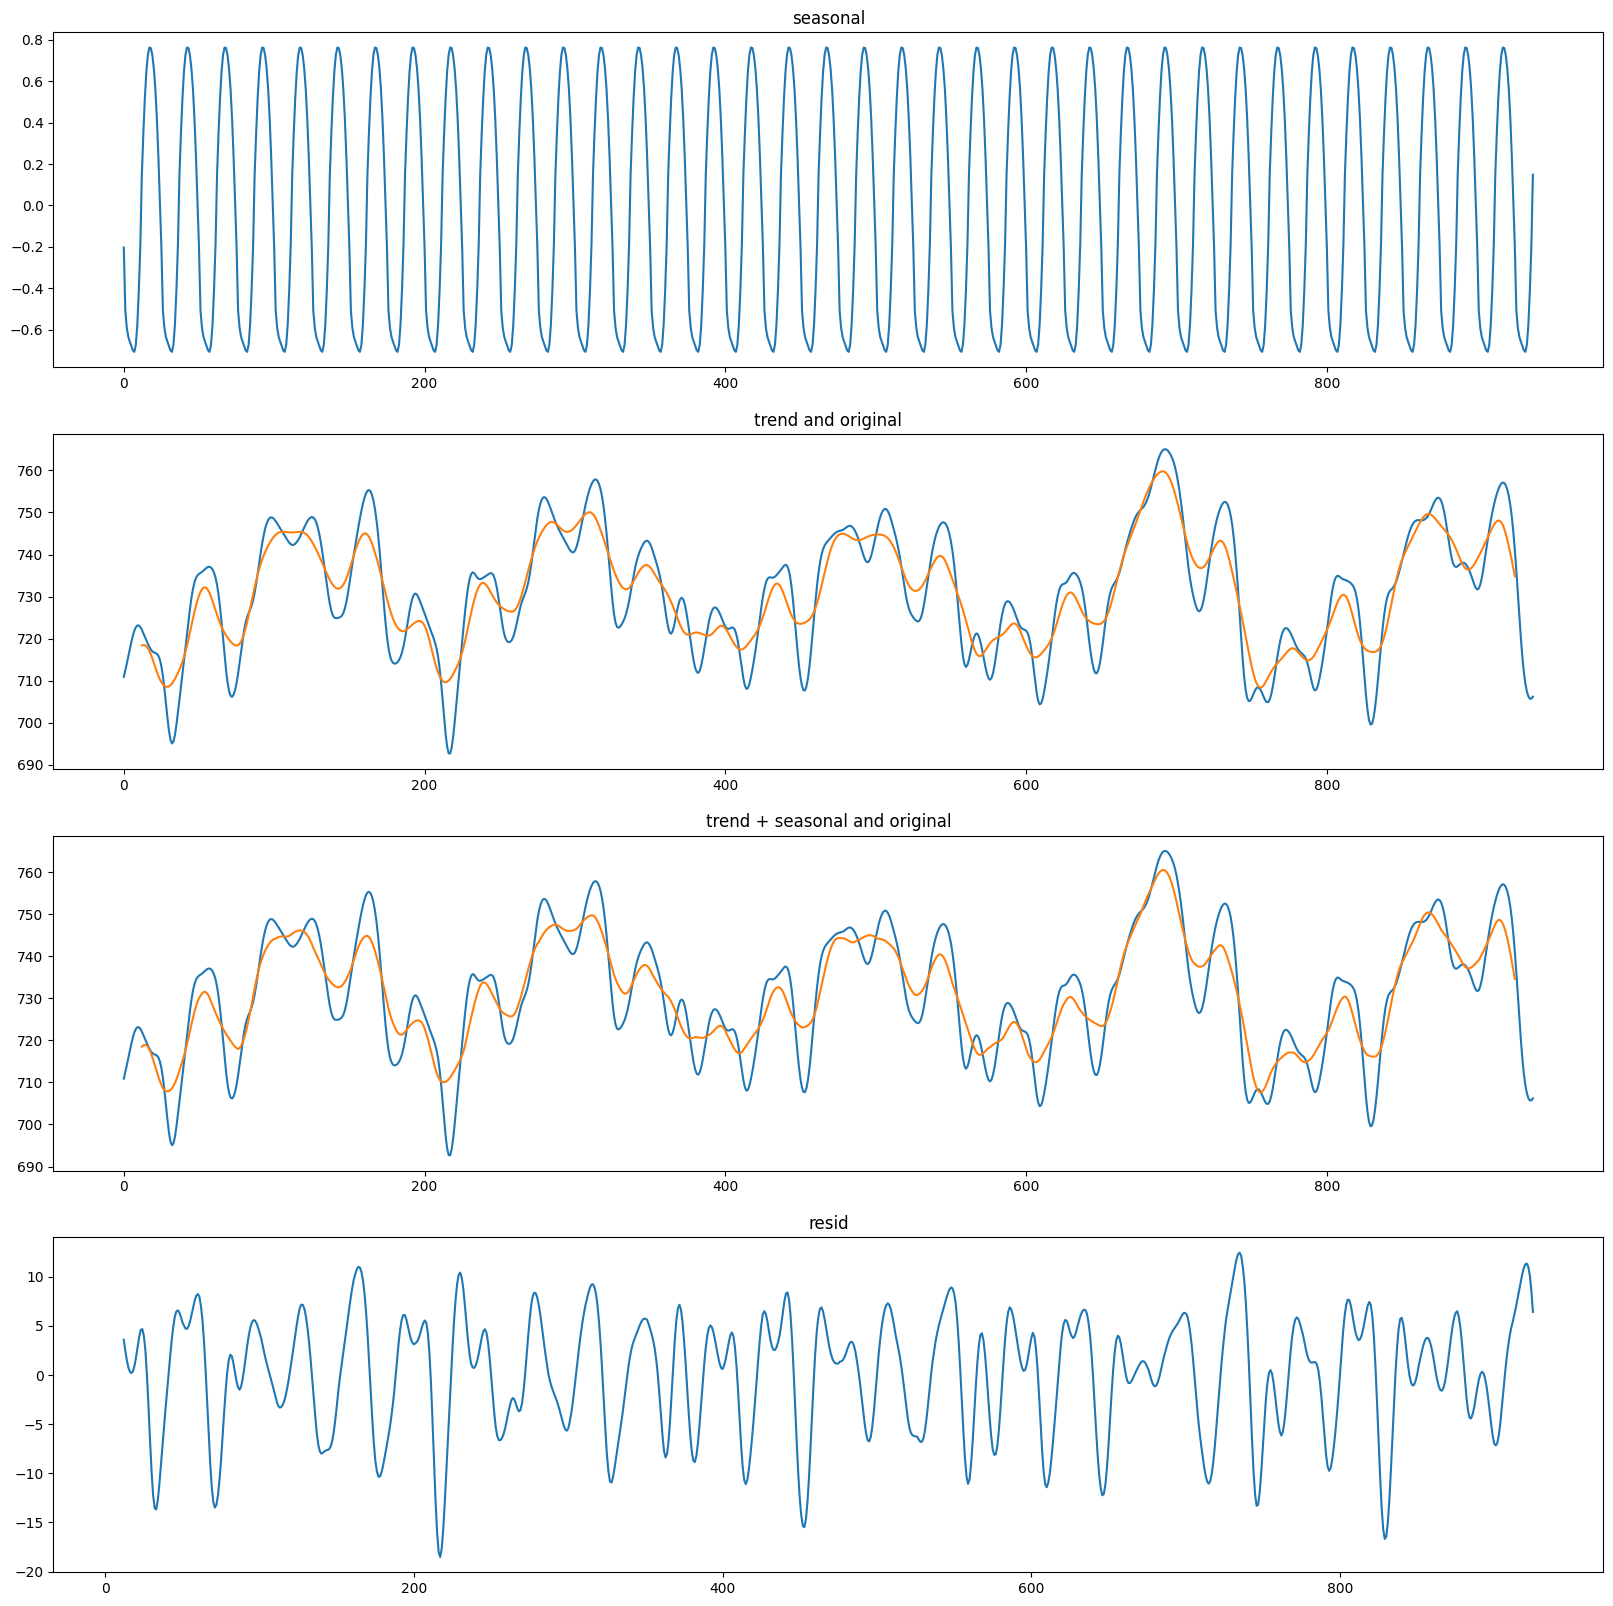

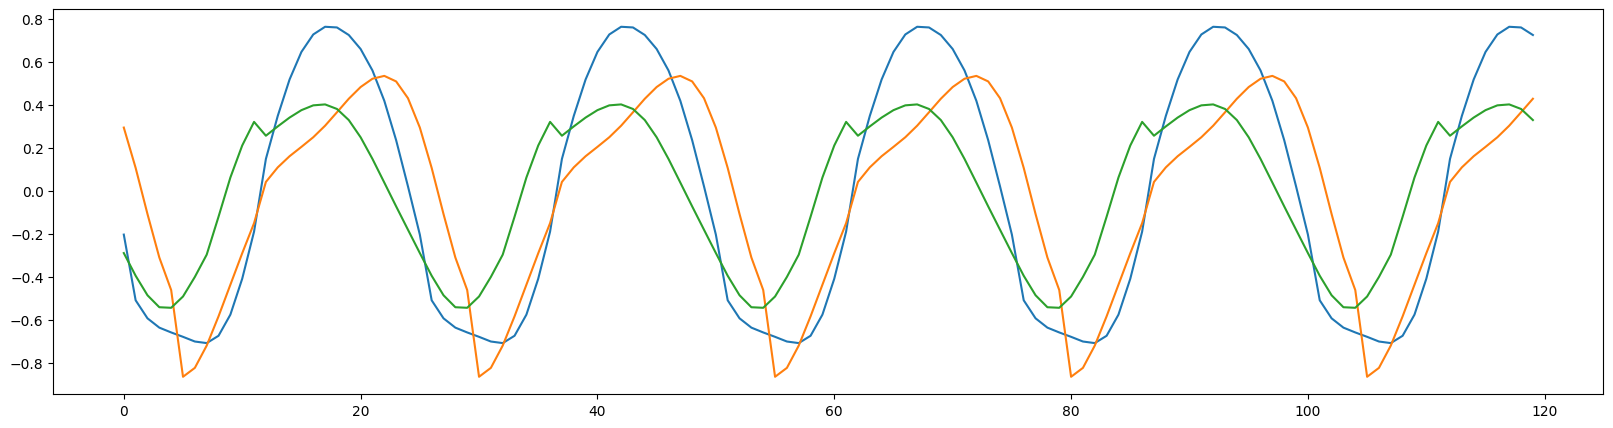

In [7]:
period = best_period
s1 = seasonal_decompose(y_piede_dx_1, period=period).seasonal
s2 = seasonal_decompose(y_piede_dx_2, period=period).seasonal
s3 = seasonal_decompose(y_piede_dx_3, period=period).seasonal

ts_plot.plot_seasonalDecompose(y_piede_dx_1, period)

ts_plot.plot_single([s1[:120], s2[:120], s3[:120]])

### Prova : 
- Divide la colonna in due e si esegue la stessa procedura sopra

In [14]:
# si procede scegliendo una colonna , eliminando i valori nulli
y_piede_dx_1 = helper.delete_nan(dataset.y_piede_dx_1)

In [17]:
# La si suddivide in due parti
middle_index = len(y_piede_dx_1)//2

first_half=y_piede_dx_1[:middle_index]

#Split the list from middle index index upto the last index in second half
sec_half=y_piede_dx_1[middle_index:]

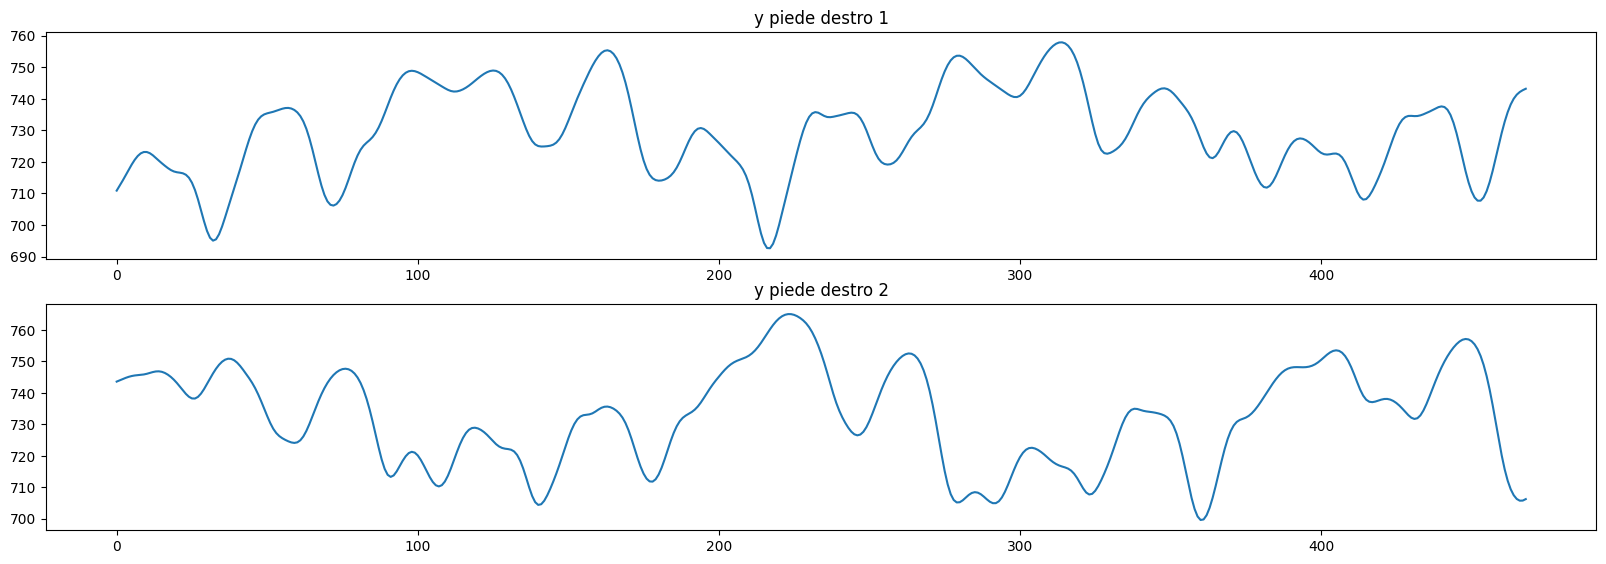

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.title('y piede destro 1')
plt.plot(first_half)

plt.subplot(3,1,2)
plt.title('y piede destro 2')
plt.plot(sec_half)


[--] error: 70.53246866651897  |      Best period: 37    | Number of errors finded:  66 
Tutti gli errori in seguito plottati:
 [990.820212663426, 268.12599258222247, 107.12327340933739, 70.53246866651897, 996.1630205334582, 2535.200468448251, 1914.7751594986732, 2075.6562923765914, 446.1526253552537, 253.68854291717335, 3205.2781569388826, 7469.675095692094, 4605.578926784882, 1090.0488666435074, 145.88681846577086, 1119.9676646570542, 1741.5806130198064, 1919.4405646765122, 145.1560353769676, 108.84641694323814, 134.85087458088856, 512.394298961431, 569.68451284883, 1089.98607248781, 2843.11399331003, 1121.9850437309933, 391.44834385307666, 1173.5404911564247, 481.9797762265302, 336.7074815170488, 285.2227389642899, 316.4521634241025, 224.0869638226597, 783.8088176295468, 1690.1807491665384, 1674.8731957721843, 1674.6820700254777, 1682.6116817268003, 1562.5808058718874, 1259.1485032132593, 807.7773438741231, 1085.0350133171899, 1574.744410153792, 2381.855511996767, 2339.8912237764, 1

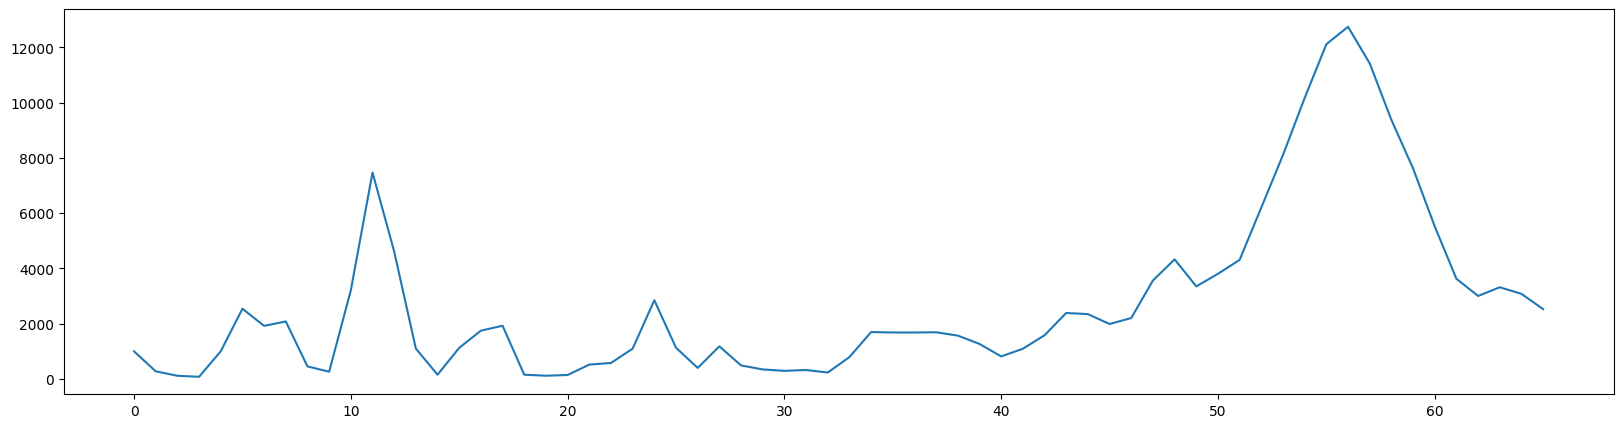

In [35]:
best_error, best_period, all_error_in_range = method_analysis.method_1([first_half, sec_half], periods[34:100])
print('[--] error: {}  |      Best period: {}    | Number of errors finded:  {} '.format(best_error, best_period , len(all_error_in_range)))
print("Tutti gli errori in seguito plottati:\n {} ".format(all_error_in_range))
ts_plot.plot_single([all_error_in_range])

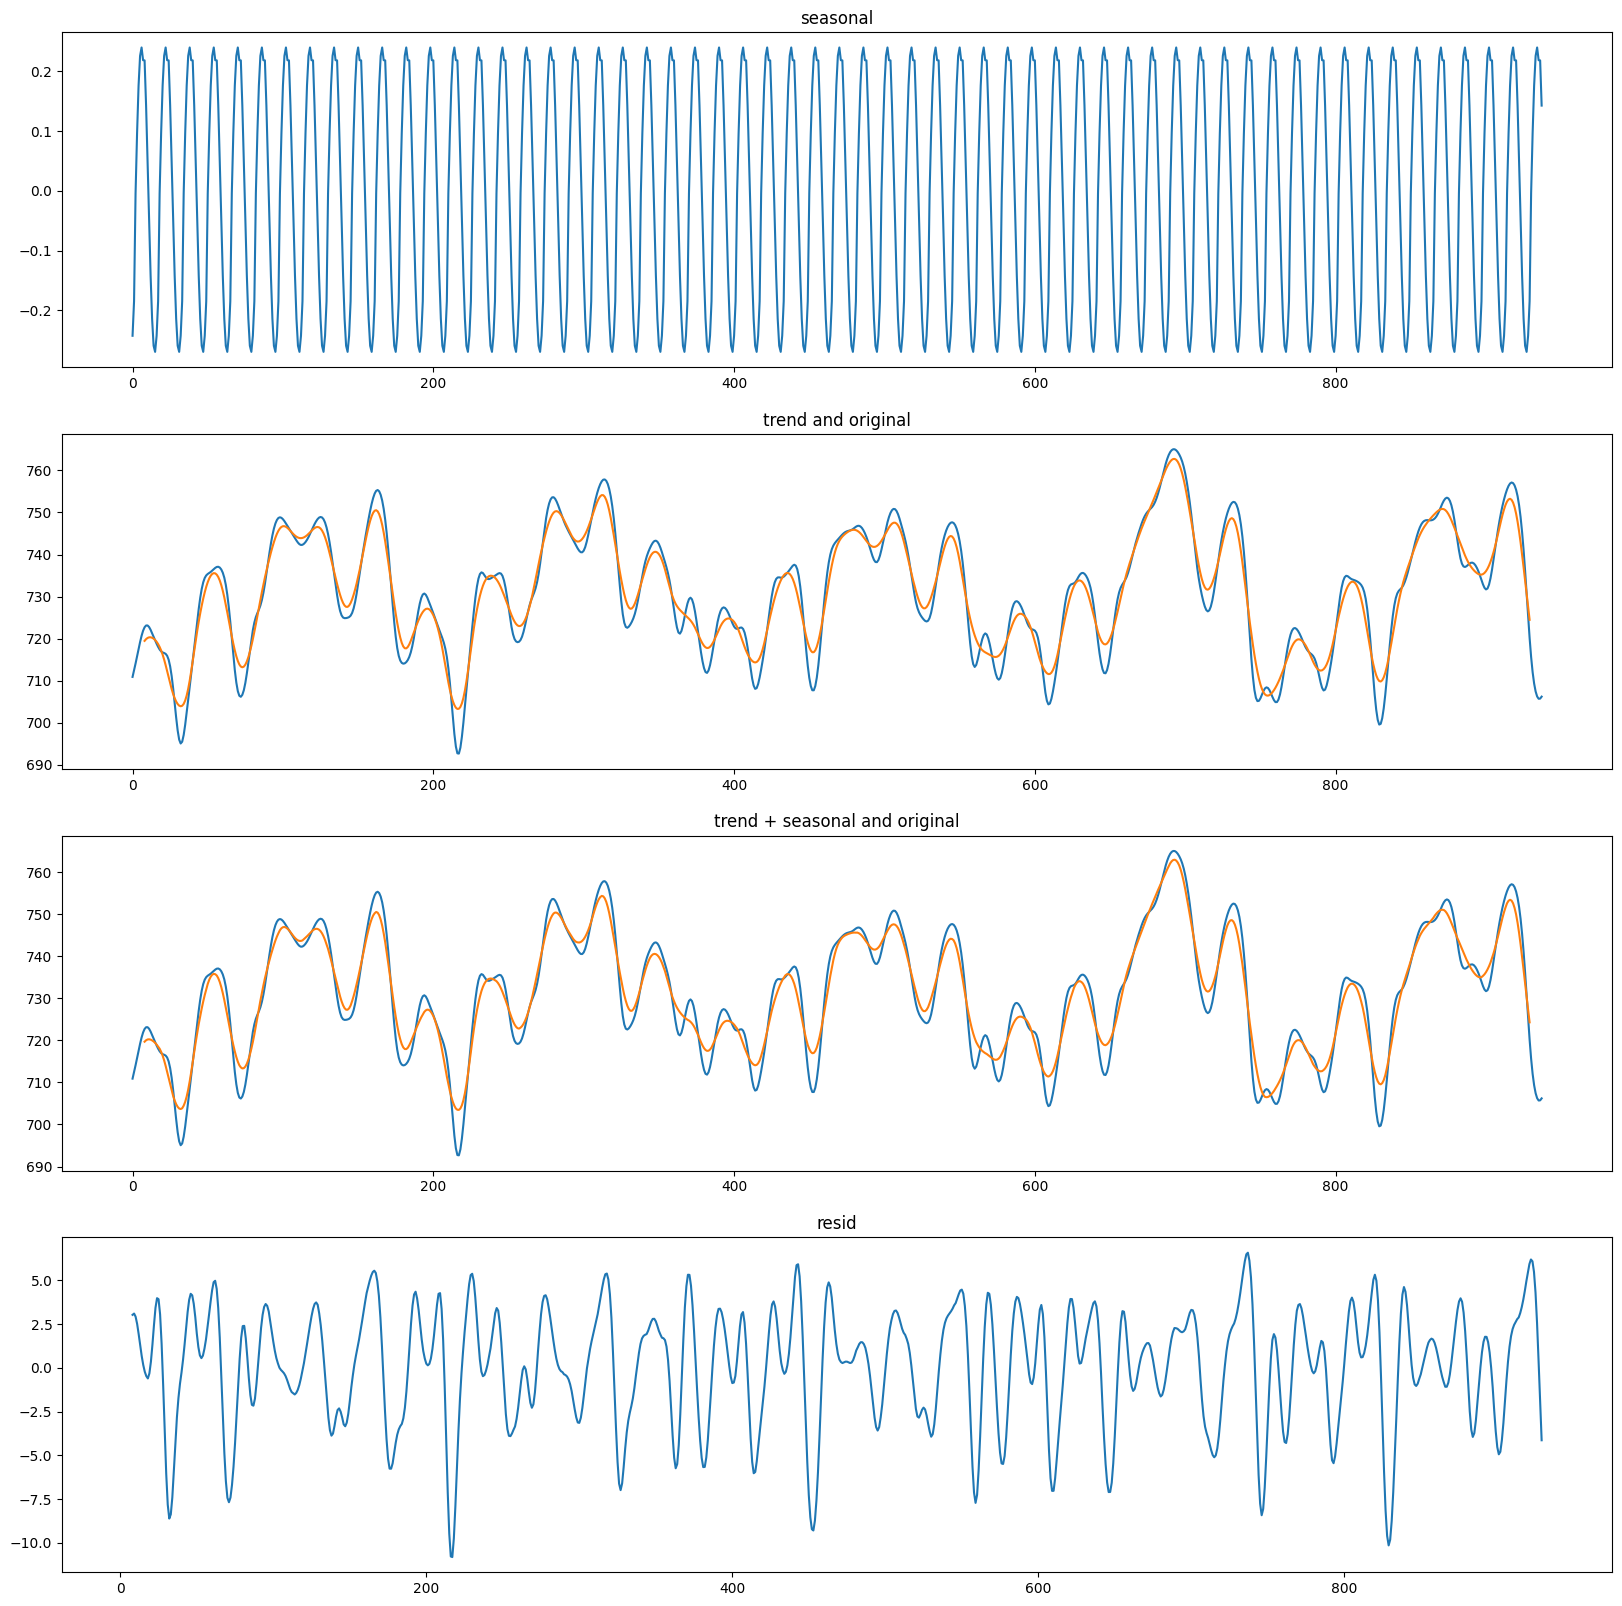

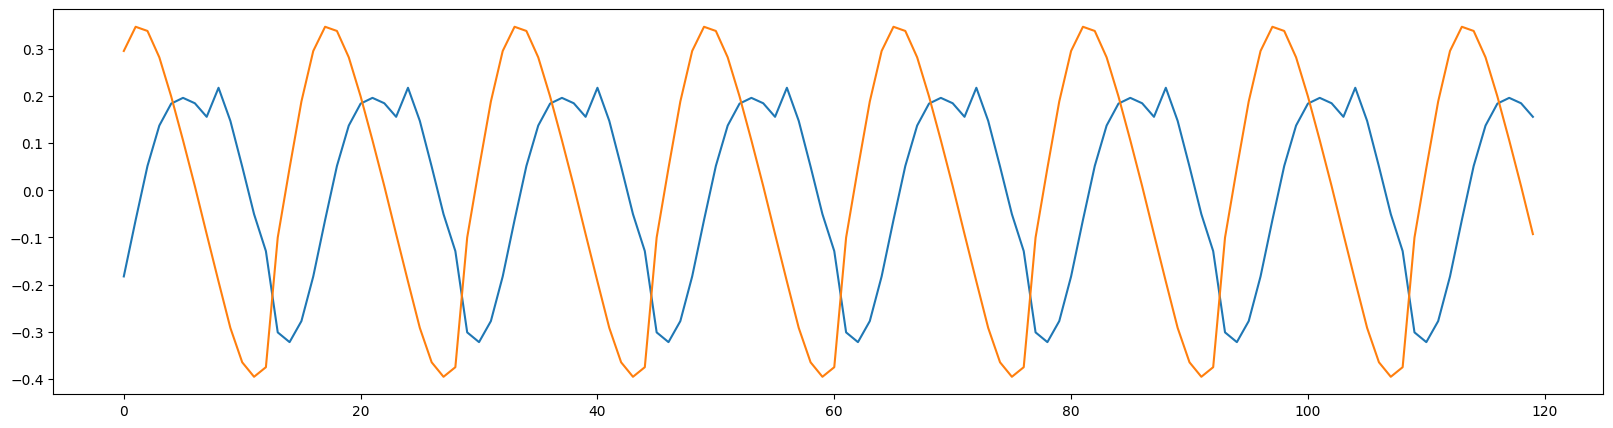

In [21]:
period = best_period
s1 = seasonal_decompose(first_half, period=period).seasonal
s2 = seasonal_decompose(sec_half, period=period).seasonal

ts_plot.plot_seasonalDecompose(y_piede_dx_1, period)

ts_plot.plot_single([s1[:120], s2[:120]])